### Construction du graph restaurant

In [48]:
# Importation de libs
import networkx as nx
import pylab as plt
import pandas as pd
import csv

In [2]:
# Déclaration du graphe avec networkx
G= nx.Graph()

In [30]:
# Lecture du fichier .csv pour la formation des arrêtes.
with open('restaurant.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    i = 0
    for row in readCSV:
        if i != 0 :
            G.add_edges_from([(row[2],row[3]),(row[2],row[4])])
        i+=1

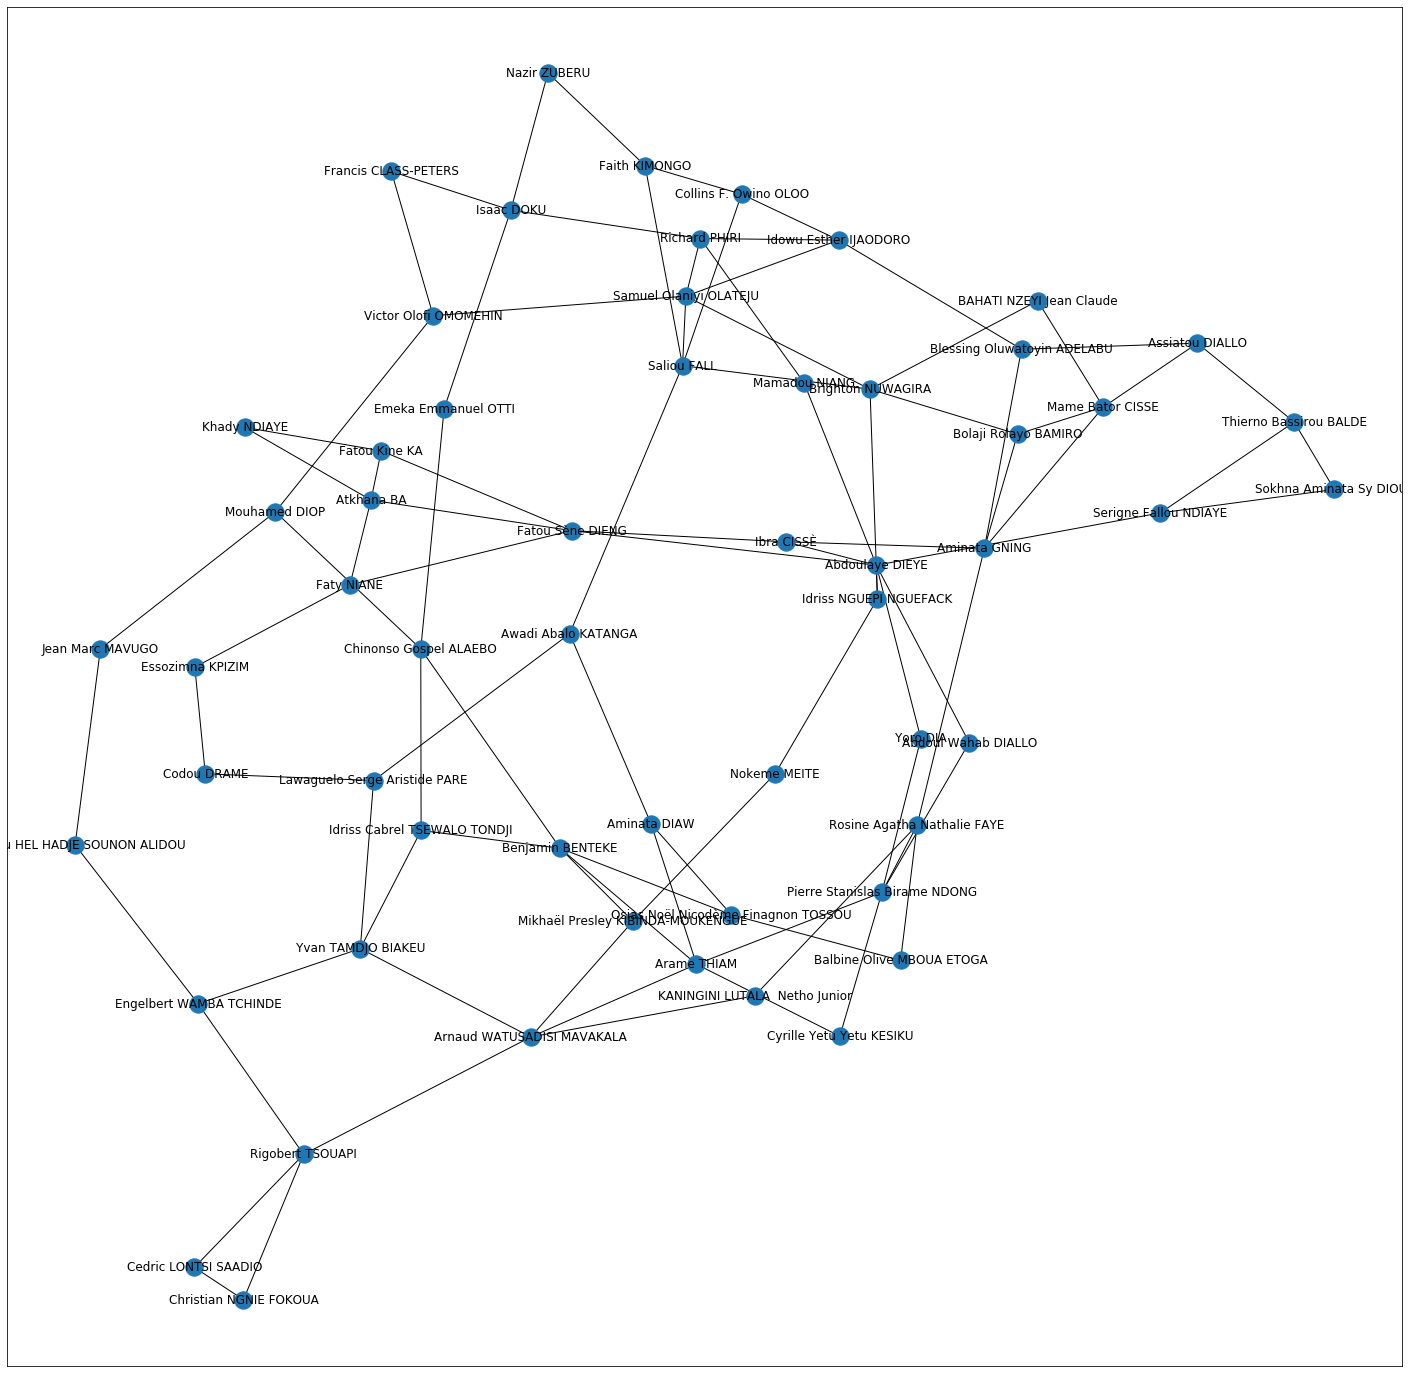

In [31]:
# Affichage du graphe en image.
figure = plt.figure(figsize = (25, 25))
plt.show(nx.draw_networkx(G,with_labels = True,pos=nx.spring_layout(G)))
figure.savefig("restaurant.png",fmt="png",bbox_inches='tight', pad_inches=0.03,dpi=300)

In [40]:
A =list(G.nodes)
len(A)

58

In [5]:
## Community detection

import networkx.algorithms.community as nxcom
# Find the communities
communities = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)


In [6]:
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1
            
def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0

In [7]:
def get_color(i, r_off=1, g_off=1, b_off=1):
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

In [8]:
 #Set node and edge communities
set_node_community(G, communities)
set_edge_community(G)

# Set community color for nodes
node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]

# Set community color for internal edges
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = [get_color(G.edges[e]['community']) for e in internal]

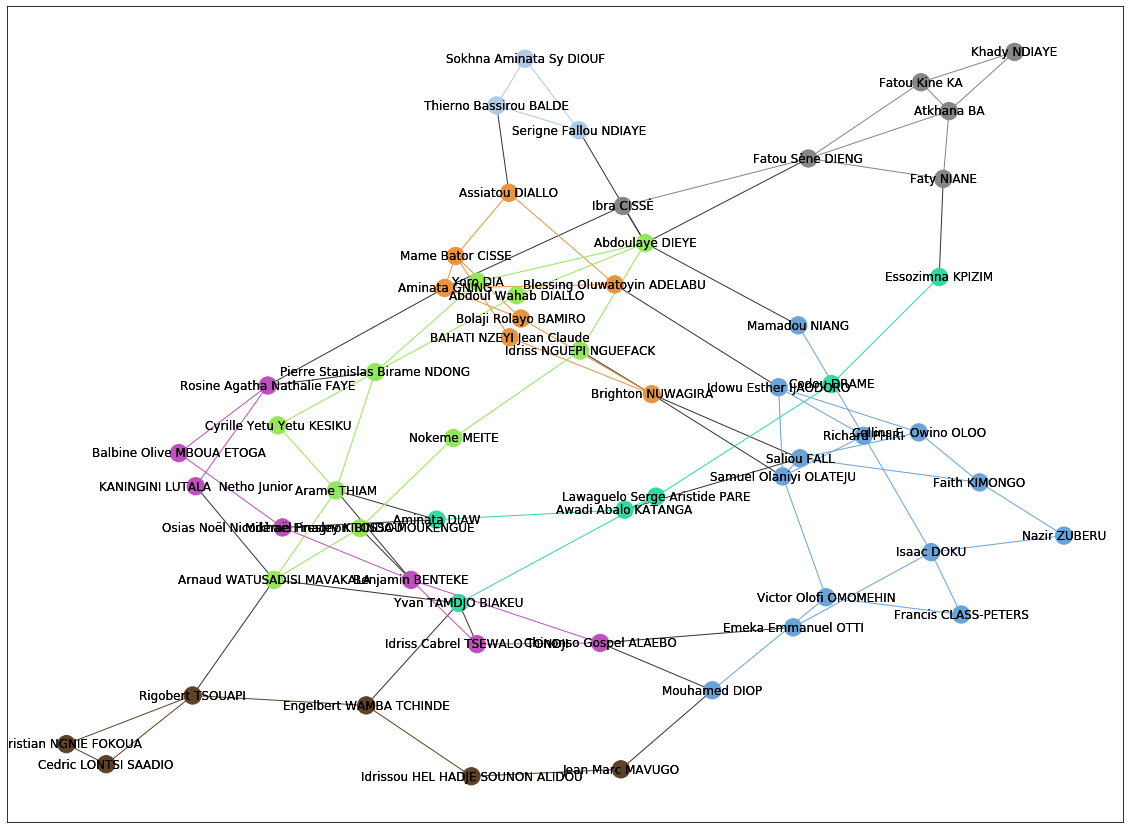

In [9]:
pos = nx.spring_layout(G)
plt.figure(figsize=(20, 15))
# Draw external edges
nx.draw_networkx(
    G,
    pos=pos,
    node_size=0,
    edgelist=external,
    edge_color="#333333")
# Draw nodes and internal edges
nx.draw_networkx(
    G,
    pos=pos,
    node_color=node_color,
    edgelist=internal,
    edge_color=internal_color)

In [10]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 58
Number of edges: 93
Average degree:   3.2069


## Clustering coefficient

In [11]:
nx.clustering(G)

{'Saliou FALL': 0.2,
 'Faith KIMONGO': 0.3333333333333333,
 'Collins F. Owino OLOO': 0.3333333333333333,
 'KANINGINI LUTALA  Netho Junior': 0,
 'Arnaud WATUSADISI MAVAKALA': 0,
 'Rosine Agatha Nathalie FAYE': 0,
 'Idowu Esther IJAODORO': 0.16666666666666666,
 'Arame THIAM': 0.1,
 'Osias Noël Nicodème Finagnon TOSSOU': 0,
 'Aminata DIAW': 0,
 'Benjamin BENTEKE': 0.1,
 'Nazir ZUBERU': 0,
 'Isaac DOKU': 0,
 'Christian NGNIE FOKOUA': 1.0,
 'Cedric LONTSI SAADIO': 1.0,
 'Rigobert TSOUAPI': 0.16666666666666666,
 'Yvan TAMDJO BIAKEU': 0,
 'Lawaguelo Serge Aristide PARE': 0,
 'Assiatou DIALLO': 0,
 'Mame Bator CISSE': 0.16666666666666666,
 'Blessing Oluwatoyin ADELABU': 0,
 'Victor Olofi OMOMEHIN': 0,
 'Samuel Olaniyi OLATEJU': 0.2,
 'Francis CLASS-PETERS': 0,
 'Cyrille Yetu Yetu KESIKU': 1.0,
 'Pierre Stanislas Birame NDONG': 0.1,
 'Yoro DIA': 0,
 'Bolaji Rolayo BAMIRO': 0.3333333333333333,
 'Brighton NUWAGIRA': 0.1,
 'Aminata GNING': 0.1,
 'Richard PHIRI': 0.16666666666666666,
 'Idriss Cabre

In [12]:
nx.average_clustering(G)

0.18817733990147778

## Distance Measures

### Degree

In [44]:
# Function to calculate degree of the graph

def calculate_degree(G, n=0):
    fndegree = []
    fnNode = []
    for node in G.nodes():
        tempD= G.degree(node)
        if tempD >= n: fndegree.append(tempD),fnNode.append(node)
    return fndegree,fnNode

In [45]:
Degree, Node = calculate_degree(G,0)

In [46]:
# Maximum degree of the Node in the Network
max(Degree)

7

In [47]:
# Minimum degree of the Node in the Network
min(Degree)

2

In [59]:
# Converting our node and Degree into a Data frame
Data = {'Node':Node, 'Degree':Degree}

df_NodeDegree = pd.DataFrame(Data)
df_NodeDegree.head(10)

,Node,Degree
0,Saliou FALL,5
1,Faith KIMONGO,3
2,Collins F. Owino OLOO,3
3,KANINGINI LUTALA Netho Junior,2
4,Arnaud WATUSADISI MAVAKALA,5
5,Rosine Agatha Nathalie FAYE,4
6,Idowu Esther IJAODORO,4
7,Arame THIAM,5
8,Osias Noël Nicodème Finagnon TOSSOU,3
9,Aminata DIAW,3


In [62]:
df_NodeDegree.sort_values(by=['Degree'],ascending=False).head(10)

,Node,Degree
39,Abdoulaye DIEYE,7
0,Saliou FALL,5
10,Benjamin BENTEKE,5
32,Fatou Sène DIENG,5
28,Brighton NUWAGIRA,5
25,Pierre Stanislas Birame NDONG,5
22,Samuel Olaniyi OLATEJU,5
29,Aminata GNING,5
7,Arame THIAM,5
4,Arnaud WATUSADISI MAVAKALA,5


In [58]:
nx.degree(G)

DegreeView({'Saliou FALL': 5, 'Faith KIMONGO': 3, 'Collins F. Owino OLOO': 3, 'KANINGINI LUTALA  Netho Junior': 2, 'Arnaud WATUSADISI MAVAKALA': 5, 'Rosine Agatha Nathalie FAYE': 4, 'Idowu Esther IJAODORO': 4, 'Arame THIAM': 5, 'Osias Noël Nicodème Finagnon TOSSOU': 3, 'Aminata DIAW': 3, 'Benjamin BENTEKE': 5, 'Nazir ZUBERU': 2, 'Isaac DOKU': 4, 'Christian NGNIE FOKOUA': 2, 'Cedric LONTSI SAADIO': 2, 'Rigobert TSOUAPI': 4, 'Yvan TAMDJO BIAKEU': 4, 'Lawaguelo Serge Aristide PARE': 3, 'Assiatou DIALLO': 3, 'Mame Bator CISSE': 4, 'Blessing Oluwatoyin ADELABU': 3, 'Victor Olofi OMOMEHIN': 3, 'Samuel Olaniyi OLATEJU': 5, 'Francis CLASS-PETERS': 2, 'Cyrille Yetu Yetu KESIKU': 2, 'Pierre Stanislas Birame NDONG': 5, 'Yoro DIA': 2, 'Bolaji Rolayo BAMIRO': 3, 'Brighton NUWAGIRA': 5, 'Aminata GNING': 5, 'Richard PHIRI': 4, 'Idriss Cabrel TSEWALO TONDJI': 3, 'Fatou Sène DIENG': 5, 'Faty NIANE': 3, 'Atkhana BA': 4, 'Thierno Bassirou BALDE': 3, 'Sokhna Aminata Sy DIOUF': 2, 'Awadi Abalo KATANGA': 3,

**<u>distance**</u>

In [39]:
D = nx.floyd_warshall_numpy(G)
df = pd.DataFrame(D)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.0,1.0,1.0,5.0,4.0,4.0,2.0,3.0,3.0,2.0,...,4.0,3.0,4.0,4.0,3.0,4.0,4.0,5.0,6.0,2.0
1,1.0,0.0,1.0,6.0,5.0,5.0,2.0,4.0,4.0,3.0,...,5.0,4.0,5.0,5.0,4.0,4.0,3.0,6.0,7.0,3.0
2,1.0,1.0,0.0,5.0,5.0,4.0,1.0,4.0,4.0,3.0,...,5.0,3.0,4.0,5.0,4.0,5.0,4.0,6.0,7.0,3.0
3,5.0,6.0,5.0,0.0,1.0,1.0,4.0,2.0,3.0,3.0,...,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,6.0,4.0
4,4.0,5.0,5.0,1.0,0.0,2.0,5.0,1.0,3.0,2.0,...,4.0,5.0,4.0,3.0,4.0,3.0,4.0,6.0,7.0,5.0
5,4.0,5.0,4.0,1.0,2.0,0.0,3.0,2.0,2.0,3.0,...,6.0,4.0,2.0,1.0,5.0,4.0,5.0,4.0,5.0,3.0
6,2.0,2.0,1.0,4.0,5.0,3.0,0.0,5.0,5.0,4.0,...,4.0,2.0,3.0,4.0,3.0,4.0,3.0,5.0,6.0,3.0
7,3.0,4.0,4.0,2.0,1.0,2.0,5.0,0.0,2.0,1.0,...,4.0,4.0,4.0,3.0,3.0,2.0,3.0,5.0,6.0,5.0
8,3.0,4.0,4.0,3.0,3.0,2.0,5.0,2.0,0.0,1.0,...,4.0,6.0,4.0,1.0,3.0,2.0,3.0,6.0,7.0,5.0
9,2.0,3.0,3.0,3.0,2.0,3.0,4.0,1.0,1.0,0.0,...,5.0,5.0,5.0,2.0,4.0,3.0,4.0,6.0,7.0,4.0


## eccentricity

In [15]:
nx.eccentricity(G)

{'Saliou FALL': 6,
 'Faith KIMONGO': 7,
 'Collins F. Owino OLOO': 7,
 'KANINGINI LUTALA  Netho Junior': 7,
 'Arnaud WATUSADISI MAVAKALA': 7,
 'Rosine Agatha Nathalie FAYE': 6,
 'Idowu Esther IJAODORO': 7,
 'Arame THIAM': 6,
 'Osias Noël Nicodème Finagnon TOSSOU': 7,
 'Aminata DIAW': 7,
 'Benjamin BENTEKE': 7,
 'Nazir ZUBERU': 8,
 'Isaac DOKU': 7,
 'Christian NGNIE FOKOUA': 9,
 'Cedric LONTSI SAADIO': 9,
 'Rigobert TSOUAPI': 8,
 'Yvan TAMDJO BIAKEU': 7,
 'Lawaguelo Serge Aristide PARE': 7,
 'Assiatou DIALLO': 7,
 'Mame Bator CISSE': 7,
 'Blessing Oluwatoyin ADELABU': 6,
 'Victor Olofi OMOMEHIN': 7,
 'Samuel Olaniyi OLATEJU': 7,
 'Francis CLASS-PETERS': 7,
 'Cyrille Yetu Yetu KESIKU': 6,
 'Pierre Stanislas Birame NDONG': 6,
 'Yoro DIA': 6,
 'Bolaji Rolayo BAMIRO': 6,
 'Brighton NUWAGIRA': 6,
 'Aminata GNING': 6,
 'Richard PHIRI': 8,
 'Idriss Cabrel TSEWALO TONDJI': 7,
 'Fatou Sène DIENG': 7,
 'Faty NIANE': 7,
 'Atkhana BA': 8,
 'Thierno Bassirou BALDE': 8,
 'Sokhna Aminata Sy DIOUF': 9,


## radius

In [16]:
nx.radius(G)

5

## Centrality measures

### degree centrality

In [33]:
nx.degree_centrality(G)

{'Saliou FALL': 0.08771929824561403,
 'Faith KIMONGO': 0.05263157894736842,
 'Collins F. Owino OLOO': 0.05263157894736842,
 'KANINGINI LUTALA  Netho Junior': 0.03508771929824561,
 'Arnaud WATUSADISI MAVAKALA': 0.08771929824561403,
 'Rosine Agatha Nathalie FAYE': 0.07017543859649122,
 'Idowu Esther IJAODORO': 0.07017543859649122,
 'Arame THIAM': 0.08771929824561403,
 'Osias Noël Nicodème Finagnon TOSSOU': 0.05263157894736842,
 'Aminata DIAW': 0.05263157894736842,
 'Benjamin BENTEKE': 0.08771929824561403,
 'Nazir ZUBERU': 0.03508771929824561,
 'Isaac DOKU': 0.07017543859649122,
 'Christian NGNIE FOKOUA': 0.03508771929824561,
 'Cedric LONTSI SAADIO': 0.03508771929824561,
 'Rigobert TSOUAPI': 0.07017543859649122,
 'Yvan TAMDJO BIAKEU': 0.07017543859649122,
 'Lawaguelo Serge Aristide PARE': 0.05263157894736842,
 'Assiatou DIALLO': 0.05263157894736842,
 'Mame Bator CISSE': 0.07017543859649122,
 'Blessing Oluwatoyin ADELABU': 0.05263157894736842,
 'Victor Olofi OMOMEHIN': 0.05263157894736842,

In [35]:
nx.closeness_centrality(G)

{'Saliou FALL': 0.29081632653061223,
 'Faith KIMONGO': 0.2384937238493724,
 'Collins F. Owino OLOO': 0.2446351931330472,
 'KANINGINI LUTALA  Netho Junior': 0.25675675675675674,
 'Arnaud WATUSADISI MAVAKALA': 0.2714285714285714,
 'Rosine Agatha Nathalie FAYE': 0.2835820895522388,
 'Idowu Esther IJAODORO': 0.26635514018691586,
 'Arame THIAM': 0.29381443298969073,
 'Osias Noël Nicodème Finagnon TOSSOU': 0.252212389380531,
 'Aminata DIAW': 0.2651162790697674,
 'Benjamin BENTEKE': 0.2714285714285714,
 'Nazir ZUBERU': 0.21673003802281368,
 'Isaac DOKU': 0.25,
 'Christian NGNIE FOKOUA': 0.18506493506493507,
 'Cedric LONTSI SAADIO': 0.18506493506493507,
 'Rigobert TSOUAPI': 0.22529644268774704,
 'Yvan TAMDJO BIAKEU': 0.2676056338028169,
 'Lawaguelo Serge Aristide PARE': 0.2638888888888889,
 'Assiatou DIALLO': 0.22709163346613545,
 'Mame Bator CISSE': 0.252212389380531,
 'Blessing Oluwatoyin ADELABU': 0.2688679245283019,
 'Victor Olofi OMOMEHIN': 0.2544642857142857,
 'Samuel Olaniyi OLATEJU': 0

In [34]:
nx.betweenness_centrality(G)

{'Saliou FALL': 0.11170326992695413,
 'Faith KIMONGO': 0.016427974698651395,
 'Collins F. Owino OLOO': 0.010835123523093449,
 'KANINGINI LUTALA  Netho Junior': 0.04517731294047084,
 'Arnaud WATUSADISI MAVAKALA': 0.1421525999063593,
 'Rosine Agatha Nathalie FAYE': 0.10671284820720911,
 'Idowu Esther IJAODORO': 0.05424561862531791,
 'Arame THIAM': 0.11575171904119272,
 'Osias Noël Nicodème Finagnon TOSSOU': 0.023840852130325815,
 'Aminata DIAW': 0.03951161098717489,
 'Benjamin BENTEKE': 0.08239126509803205,
 'Nazir ZUBERU': 0.006025480367585631,
 'Isaac DOKU': 0.06346500026011304,
 'Christian NGNIE FOKOUA': 0.0,
 'Cedric LONTSI SAADIO': 0.0,
 'Rigobert TSOUAPI': 0.08197577276524647,
 'Yvan TAMDJO BIAKEU': 0.09610737007353551,
 'Lawaguelo Serge Aristide PARE': 0.0904125584106787,
 'Assiatou DIALLO': 0.026113895850737954,
 'Mame Bator CISSE': 0.027216105740541827,
 'Blessing Oluwatoyin ADELABU': 0.05735831107071708,
 'Victor Olofi OMOMEHIN': 0.06821581196581197,
 'Samuel Olaniyi OLATEJU': 

## b) Calculate the edge density.

In [18]:
def number_of_nodes(G):
    return G.number_of_nodes()

def number_of_edges(G):
    return G.number_of_edges()


#-------------------------------------
def density(G):
    n=number_of_nodes(G)
    m=number_of_edges(G)
    if m==0 or n <= 1:
        d=0.0
    elif G.is_directed():
        d=m/float(n*(n-1))
    else:
        d= m*2.0/float(n*(n-1))
    return d

In [19]:
density(G)

0.056261343012704176

In [20]:
nx.density(G)

0.056261343012704176

## Calculate the average clustering coefficient

In [21]:
def average_clustering(G, nodes = None, weight = None , count_zeros=True):
    c = nx.clustering(G, nodes, weight=weight).values()
    if not count_zeros:
        c = [v for v in c if v > 0]
    return sum(c) / len(c)

In [22]:
average_clustering(G)

0.18817733990147778

In [23]:
nx.average_clustering(G)

0.18817733990147778

## (d) Calculate the degree distribution P (k) and complementary cumulative degree distribution 1 −CDF (k) of the network

In [76]:
nx.degree_histogram(G)

[0, 0, 19, 20, 9, 9, 0, 1]

In [61]:
df_NodeDegree.sort_values(by=['Degree'],ascending=False).head()

,Node,Degree
39,Abdoulaye DIEYE,7
0,Saliou FALL,5
10,Benjamin BENTEKE,5
32,Fatou Sène DIENG,5
28,Brighton NUWAGIRA,5


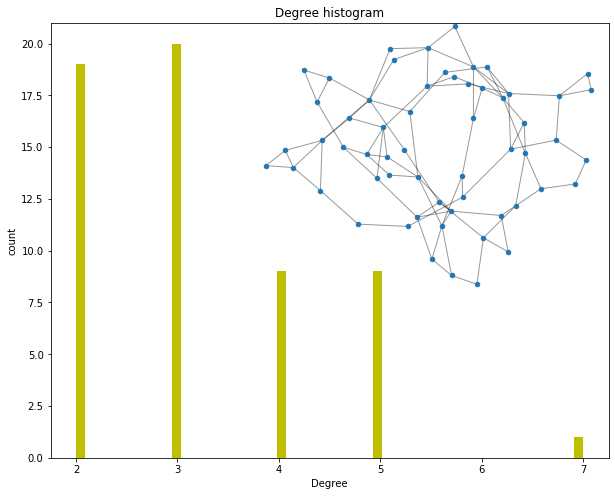

In [82]:
plt.figure(figsize=(10,8))
plt.hist(df_NodeDegree['Degree'],58,color='y')
plt.xlabel('Degree')
plt.ylabel('count')
plt.title('Degree histogram')
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)
plt.show()
plt.close()

<Figure size 864x576 with 0 Axes>

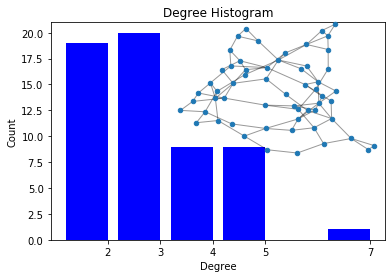

In [25]:
import collections
import matplotlib.pyplot as plt
import networkx as nx

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
plt.figure(figsize=(12,8))
fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')
# plt.figure(figsize=(12,8))
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

## e) Calculate the average shortest path length l

In [26]:
l= nx.average_shortest_path_length(G)
l

4.055051421657592

# Community detection

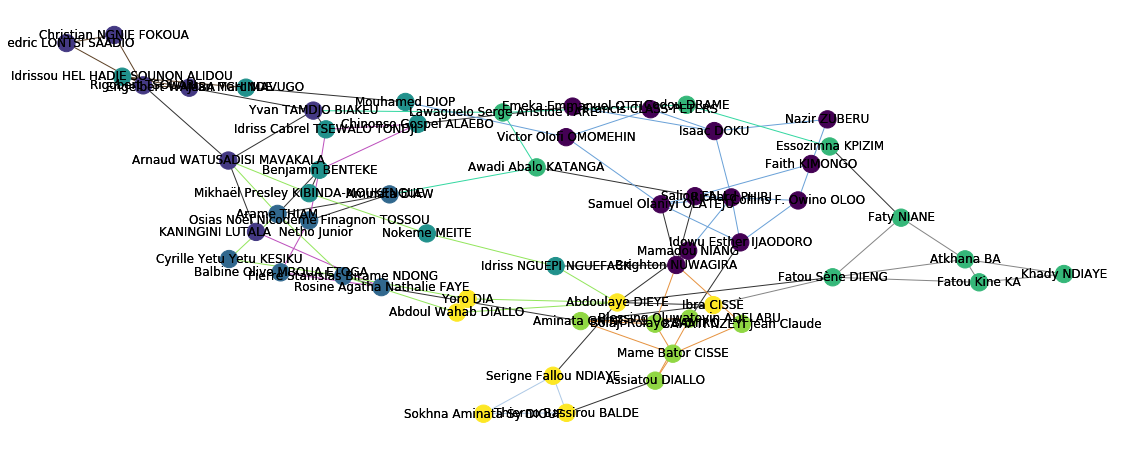

In [124]:
import community
pos = nx.spring_layout(G)
plt.figure(figsize=(20, 8))
parts = community.best_partition(G)
values = [parts.get(node) for node in G.nodes()]
plt.axis("off")
#nx.draw_networkx(G, pos = pos, cmap = plt.get_cmap("jet"), 
#node_color = values, node_size = 35, with_labels = False)
internal_color = [get_color(G.edges[e]['community']) for e in internal]

nx.draw_networkx(
    G,
    pos=pos,
    node_size=0,
    edgelist=external,
    edge_color="#333333")
# Draw nodes and internal edges
nx.draw_networkx(
    G,
    pos=pos,
    node_color=values,
    edgelist=internal,
    edge_color=internal_color)